In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../../python/")
import util
import plotting

In [2]:
import seaborn as sns

sns.set_style("ticks")
sns.set_palette("colorblind")

In [3]:
from matplotlib import ticker
import matplotlib as mpl

# original data

In [4]:
cv_trajs = np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)

In [5]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [6]:
remove = [
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
]

In [7]:
data_trajs = np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True)

In [8]:
print(len(livac_trajs), len(ri_trajs), len(data_trajs), len(cv_trajs))

livac_arr = np.concatenate(livac_trajs)
ri_arr = np.concatenate(ri_trajs)
data_arr = np.concatenate(data_trajs)
cv_arr = np.concatenate(cv_trajs)
print(livac_arr.shape, ri_arr.shape, data_arr.shape, cv_arr.shape)

NameError: name 'livac_trajs' is not defined

In [ ]:
from itertools import combinations

In [ ]:
# useful salt bridges
# R226-D129, R229-D129, R226-D186, R229-D186
sb_ids = [42, 48, 47, 53]

# salt bridges that would be good for down- to down transition (just shifted up by one arginine)
# R223-D129, R226-D129, R223-D186, R226-D186
sb_ids_dd = [36, 42, 41, 47]

# up to up+
sb_ids_uu = [48, 54, 53, 59]

In [ ]:
feat2_models = np.load("../../data/models_centroids_feat2.npy")

### Adaptive sampling data

In [12]:
# load CV data
cvs = []
for i in range(83, 164):
    d = str(i).zfill(3)
    cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds.txt")[:3000])
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds-{j}.txt")[:3000])
for i in range(266, 286):
    d = str(i).zfill(3)
    cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds.txt")[:3000])
for j in range(2, 4):
    for i in range(266, 286):
        d = str(i).zfill(3)
        cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds-{j}.txt")[:3000])

In [13]:
for c in cvs:
    print(len(c))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
313
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
76
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
196
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000

In [14]:
# ignore ones which have less than full 3000 frames
cv_files = []
nc_files = []
for i in range(83, 164):
    d = str(i).zfill(3)
    cv_files.append(f"../../suppl-runs/{d}/ds.txt")
    nc_files.append(f"../../suppl-runs/{d}/civsd.nc")
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        cv_files.append(f"../../suppl-runs/{d}/ds-{j}.txt")
        nc_files.append(f"../../suppl-runs/{d}/civsd-{j}.nc")
for i in range(266, 286):
    d = str(i).zfill(3)
    cv_files.append(f"../../suppl-runs/{d}/ds.txt")
    nc_files.append(f"../../suppl-runs/{d}/civsd.nc")
for j in range(2, 4):
    for i in range(266, 286):
        d = str(i).zfill(3)
        cv_files.append(f"../../suppl-runs/{d}/ds-{j}.txt")
        nc_files.append(f"../../suppl-runs/{d}/civsd-{j}.nc")

In [15]:
for i, (f, c) in enumerate(zip(cv_files, cvs)):
    if len(c) != 3000:
        print(f, i)

../../suppl-runs/272/ds.txt 150
../../suppl-runs/272/ds-2.txt 170
../../suppl-runs/272/ds-3.txt 190


In [16]:
# ignore 272
for i in (190, 170, 150):
    for lst in cvs, cv_files, nc_files:
        del lst[i]

In [17]:
# save cvs and files
np.save("../../data/raw_feat/cv_dist_spin_suppl_01.npy", cvs[144:])
np.savetxt("../../data/suppl_cv_files.txt", cv_files, fmt="%s")
np.savetxt("../../data/suppl_traj_files.txt", nc_files, fmt="%s")

## Load features 

In [19]:
import pyemma

In [45]:
feat = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
pair_indices = np.loadtxt("../../data/feat3_atom_indices.txt", dtype=np.int32)
feat.add_distances(pair_indices)
print(feat.describe())

['DIST: ARG 217 CA 1768 - ASP 129 CA 406', 'DIST: ARG 217 CA 1768 - ASP 136 CA 530', 'DIST: ARG 217 CA 1768 - ASP 151 CA 751', 'DIST: ARG 217 CA 1768 - ASP 164 CA 944', 'DIST: ARG 217 CA 1768 - GLU 183 CA 1258', 'DIST: ARG 217 CA 1768 - ASP 186 CA 1299', 'DIST: ARG 223 CA 1872 - ASP 129 CA 406', 'DIST: ARG 223 CA 1872 - ASP 136 CA 530', 'DIST: ARG 223 CA 1872 - ASP 151 CA 751', 'DIST: ARG 223 CA 1872 - ASP 164 CA 944', 'DIST: ARG 223 CA 1872 - GLU 183 CA 1258', 'DIST: ARG 223 CA 1872 - ASP 186 CA 1299', 'DIST: ARG 226 CA 1934 - ASP 129 CA 406', 'DIST: ARG 226 CA 1934 - ASP 136 CA 530', 'DIST: ARG 226 CA 1934 - ASP 151 CA 751', 'DIST: ARG 226 CA 1934 - ASP 164 CA 944', 'DIST: ARG 226 CA 1934 - GLU 183 CA 1258', 'DIST: ARG 226 CA 1934 - ASP 186 CA 1299', 'DIST: ARG 229 CA 1990 - ASP 129 CA 406', 'DIST: ARG 229 CA 1990 - ASP 136 CA 530', 'DIST: ARG 229 CA 1990 - ASP 151 CA 751', 'DIST: ARG 229 CA 1990 - ASP 164 CA 944', 'DIST: ARG 229 CA 1990 - GLU 183 CA 1258', 'DIST: ARG 229 CA 1990 - A

In [21]:
nc_files[144]

'../../suppl-runs/266/civsd.nc'

In [29]:
xtc_files = []
for i in range(83, 164):
    d = str(i).zfill(3)
    xtc_files.append(f"../../suppl-runs/{d}/civsd_pro.xtc")
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        xtc_files.append(f"../../suppl-runs/{d}/civsd_pro_{j}.xtc")
for i in range(266, 286):
    d = str(i).zfill(3)
    xtc_files.append(f"../../suppl-runs/{d}/civsd_pro.xtc")
for j in range(2, 4):
    for i in range(266, 286):
        d = str(i).zfill(3)
        xtc_files.append(f"../../suppl-runs/{d}/civsd_pro_{j}.xtc")
# remove folder 272
for i in (190, 170, 150):
    del xtc_files[i]

In [30]:
np.savetxt("../../data/suppl_xtc_files.txt", xtc_files, fmt="%s")

In [31]:
xtc_files[144]

'../../suppl-runs/266/civsd_pro.xtc'

In [46]:
suppl_sbs = pyemma.coordinates.load(xtc_files[144:], features=feat, chunksize=32)
np.save("../../data/raw_feat/feat2_suppl_04.npy", suppl_sbs)

## load previous supplemental data

In [48]:
cv_trajs = [
    *np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True),
    *cvs,
]
sb_trajs = list(np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
for i in range(5):
    sb_trajs.extend(
        np.load(f"../../data/raw_feat/feat2_suppl_{i:02d}.npy", allow_pickle=True)
    )
cv_arr = np.concatenate(cv_trajs)
sb_arr = np.concatenate(sb_trajs)
print(cv_arr.shape, sb_arr.shape)

(3603000, 2) (3603000, 60)


# Plot new sampling data

In [10]:
import random

random.seed(123)

In [11]:
cv_suppl_arr = np.concatenate(cvs)
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)

N = len(cv_suppl_arr)
skip = 5
inds = random.sample(range(N), N // skip)
ax.scatter(cv_suppl_arr[inds, 0], cv_suppl_arr[inds, 1], alpha=0.05)
plotting.format_cvs(ax, centroids=True)

NameError: name 'cvs' is not defined

In [53]:
import matplotlib as mpl

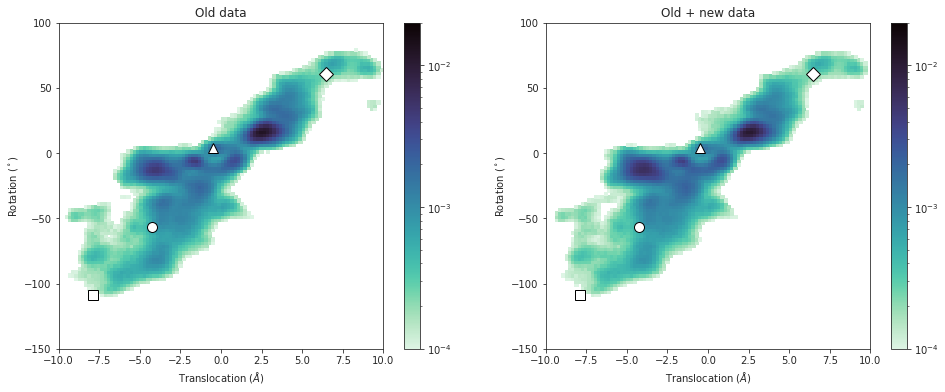

In [58]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

e = 3_000_000
norm = mpl.colors.LogNorm(vmin=1e-4, vmax=2e-2)
_, _, _, h0 = ax0.hist2d(
    cv_arr[:e, 0],
    cv_arr[:e, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=norm,
)
_, _, _, h1 = ax1.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=norm,
)
f.colorbar(h0, ax=ax0)
f.colorbar(h1, ax=ax1)
ax0.set_title("Old data")
ax1.set_title("Old + new data")
plotting.format_cvs(ax0, centroids=True)
plotting.format_cvs(ax1, centroids=True)

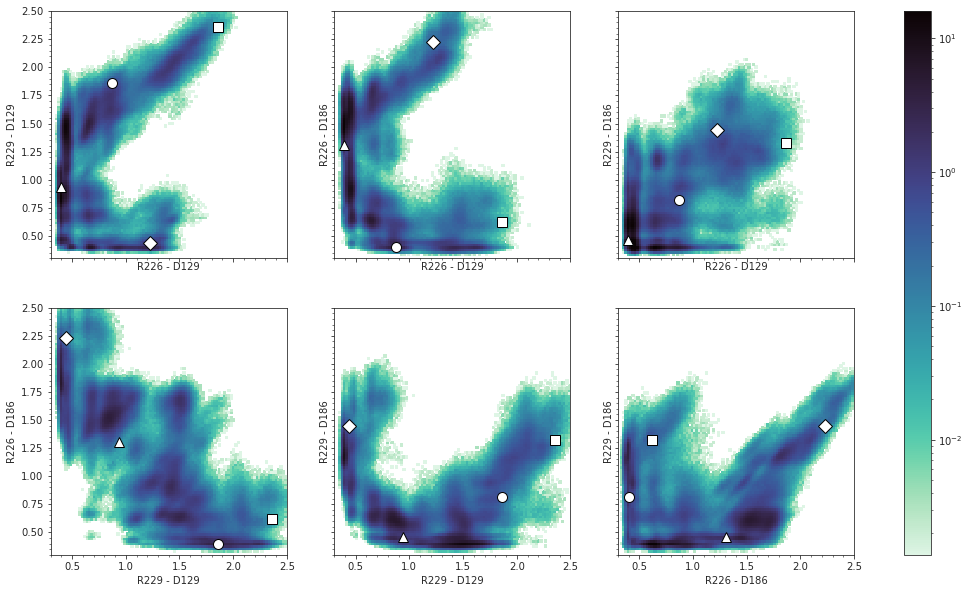

In [59]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[:e, sb1],
        sb_arr[:e, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

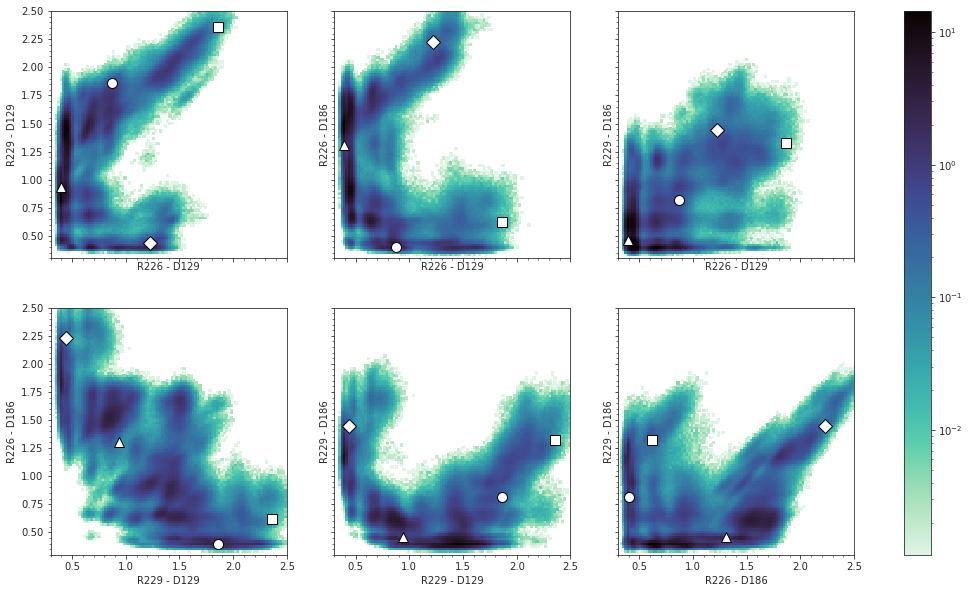

In [60]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[:, sb1],
        sb_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

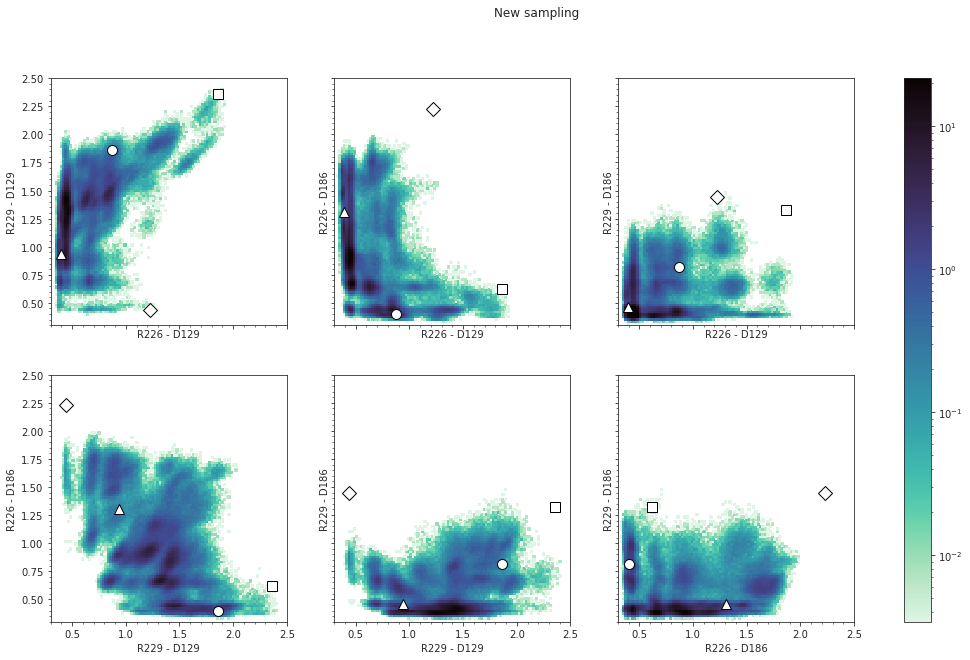

In [61]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[e:, sb1],
        sb_arr[e:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())
f.suptitle("New sampling")
axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

# load feature 5

In [63]:
feat5 = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
pair_indices5 = np.loadtxt(
    "../../amber-gpu/pyemma-civsd-feat5-msmb-combined/AtomIndices.txt", dtype=np.int32
)
feat5.add_residue_mindist(
    residue_pairs=pair_indices5, scheme="closest-heavy", threshold=0.45, periodic=False
)
print(len(feat5.describe()))

1924


In [91]:
suppl_feat5 = pyemma.coordinates.load(xtc_files[144:], features=feat5, chunksize=32)
np.savez_compressed("../../data/raw_feat/feat5_suppl_01.npz", suppl_feat5)

# New seeds

In [9]:
new_seeds = []
sb_suppl_arr = sb_arr[3_000_000:]
for i in util.find_closest_points((0.55, 1.1), sb_suppl_arr[:, [42, 48]], n=10):
    traj = i // 3000
    if traj >= 144:
        print(f"{nc_files[i // 3000]} {i % 3000}")
        new_seeds.append((i // 3000, i % 3000))

NameError: name 'sb_arr' is not defined

In [69]:
new_seeds

[(147, 2052), (147, 955), (147, 1463), (147, 880), (148, 61)]

In [75]:
for i in util.find_closest_points((0.5, 0.5), sb_suppl_arr[:, [42, 47]], n=5):
    traj = i // 3000
    if traj >= 144:
        print(f"{cv_files[i // 3000]} {i % 3000}")
        new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/271/ds-2.txt 1934
../../suppl-runs/284/ds.txt 2616
../../suppl-runs/274/ds.txt 230
../../suppl-runs/271/ds-3.txt 2022


In [80]:
for i in util.find_closest_points((1.8, 0.55), sb_suppl_arr[:, [48, 53]], n=5):
    traj = i // 3000
    print(f"{cv_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/271/ds.txt 298
../../suppl-runs/153/ds.txt 16
../../suppl-runs/153/ds.txt 683
../../suppl-runs/109/ds.txt 1354
../../suppl-runs/110/ds.txt 1750


In [81]:
new_seeds

[(147, 2052),
 (147, 955),
 (147, 1463),
 (147, 880),
 (148, 61),
 (168, 1934),
 (161, 2616),
 (151, 230),
 (187, 2022),
 (149, 298),
 (70, 16),
 (70, 683),
 (26, 1354),
 (27, 1750)]

In [83]:
import mdtraj as md
import os

In [92]:
start_folder = 286
for n, (i, j) in enumerate(new_seeds):
    frame = md.load_netcdf(
        nc_files[i], top="../../suppl-runs/000/civsd.prmtop", frame=j
    )
    new_folder = f"../../suppl-runs/{str(start_folder + n).zfill(3)}"
    if not os.path.exists(new_folder):
        os.mkdir(new_folder)
    frame.save_amberrst7(f"{new_folder}/rest.rst7")

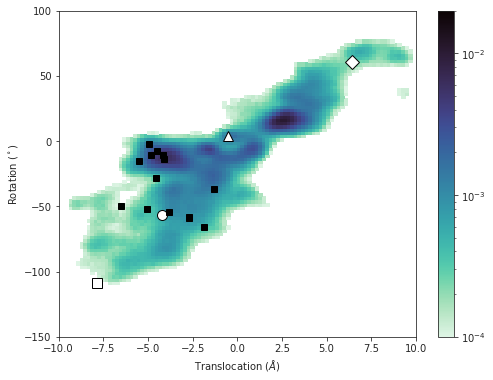

In [89]:
f, ax = plt.subplots(figsize=(8, 6))

norm = mpl.colors.LogNorm(vmin=1e-4, vmax=2e-2)
_, _, _, h = ax.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=norm,
)
f.colorbar(h, ax=ax)
plotting.format_cvs(ax, centroids=True)

for (i, j) in new_seeds:
    ax.plot(cv_trajs[i + 237][j, 0], cv_trajs[i + 237][j, 1], "sk")

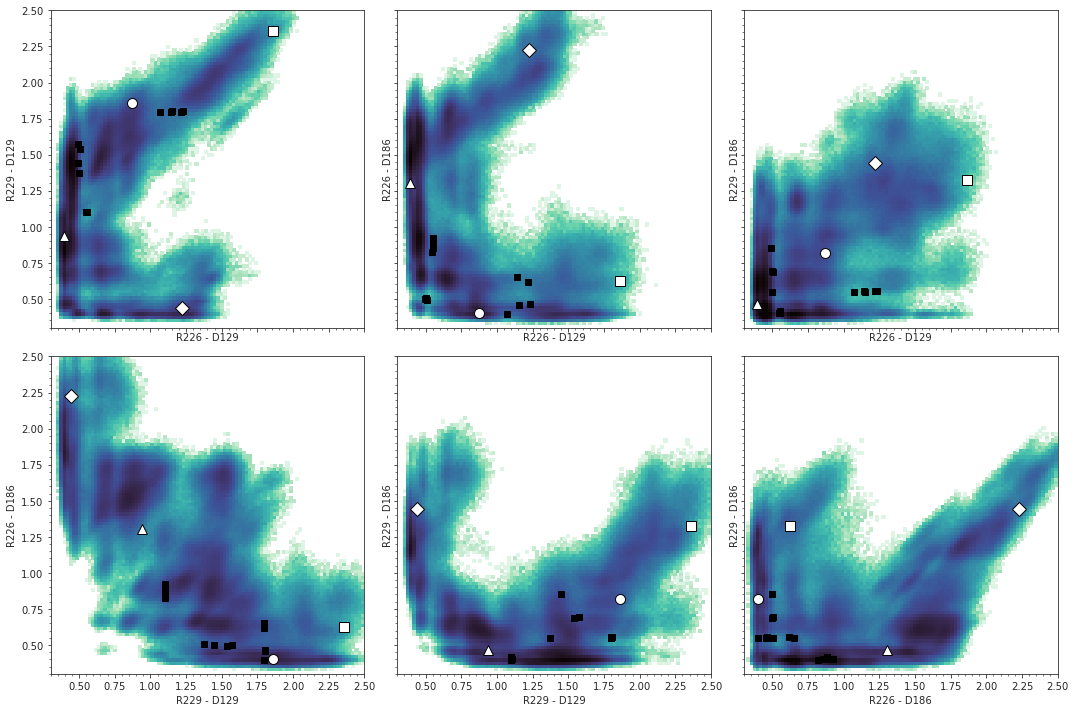

In [90]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[:, sb1],
        sb_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )

    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    for (i, j) in new_seeds:
        ax.plot(sb_trajs[i + 237][j, sb1], sb_trajs[i + 237][j, sb2], "sk")

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)
f.tight_layout()

In [12]:
# plot all seeds
traj_files = np.loadtxt("../../data/suppl_traj_files.txt", dtype=str)